To create new world clone https://github.com/cellworld/utilities and follow the steps in the README file. You can check the outputs of the executable files using this notebook.

Relevant Scripts and what they produce:<br>
1. create_world.cpp -> (hexagonal.00_00.occlusions, hexagonal.00_00.astar)
2. create_robot_world.cpp -> (hexagonal.00_00.astar.robot, hexagonal.00_00.occlusions.robot)
3. create_predator_destinations.cpp -> (hexagonal.00_00.predator_destinations)
4. create_visibility.cpp -> (hexagonal.00_00.cell_visibility)
5. create_spawn_locations.cpp -> (hexagonal.00_00.spawn_locations)
      1. note: need to run steps 3 & 4 first

Relevant Scripts and what they produce:<br>
1. XXXXXX
2. create_robot_occlusions.cpp -> (hexagonal.00_00.occlusions.robot)
3. create_paths.cpp -> (hexagonal.00_00.astar, hexagonal.00_00.astar.robot)
4. create_visibility.cpp -> (hexagonal.00_00.cell_visibility)
5. create_spawn_locations.cpp -> (hexagonal.00_00.spawn_locations)
      1. note: need to run steps 3 & 4 first


<div style="font-family: monospace; white-space: pre;">
cellworld_data
├── cell_group
│   ├── hexagonal.00_00.occlusions
│   ├── hexagonal.00_00.occlusions.robot
│   ├── hexagonal.00_00.predator_destinations
│   └── hexagonal.00_00.spawn_locations
├── paths
│   ├── hexagonal.00_00.astar (needed for simulation only)
│   └── hexagonal.00_00.astar.robot
└── graph
    └── hexagonal.00_00.cell_visibility
</div>


./build_utilities 

./prep_world 00_00 -f


# 0. Install relevant packages and input occlusion configuration to check

In [ ]:
%pip install cellworld==0.0.341

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import io
import math
import matplotlib.pyplot as plt
from cellworld import *

In [4]:
occlusions = "21_05"  # input new world occlusions

# 1. Display new world

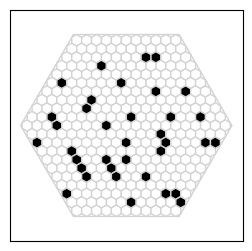

<Figure size 1000x1000 with 0 Axes>

In [5]:
imp = 'hexagonal' # robot
world = World.get_from_parameters_names(imp, "canonical", occlusions)
map = Cell_map(world.configuration.cell_coordinates)
free_cell_ids = world.cells.free_cells().get('id')   # free cells in world

fig, axs = plt.subplots(figsize=(3, 3), nrows = 1, ncols = 1)
d = Display(world, background_color = 'white', cell_edge_color = 'lightgrey', habitat_edge_color='lightgrey', ax = axs)

# 2. Check world setup for A* path creation 
Use this to make sure the cells "blocked" from the robot are correct. Check A* paths are created on the correct "restricted" world (robot world).





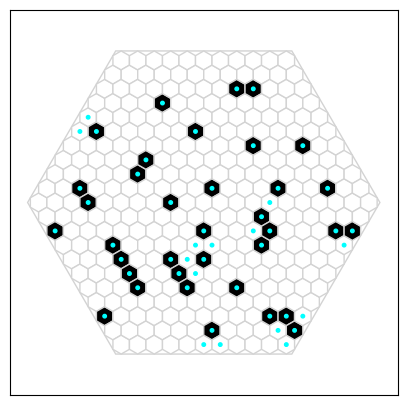

<Figure size 1000x1000 with 0 Axes>

In [6]:
fig, axs = plt.subplots(figsize=(5, 5), nrows = 1, ncols = 1)
d = Display(world, background_color = 'white', cell_edge_color = 'lightgrey', habitat_edge_color='lightgrey', ax = axs)

# plot all "occlusions" in robot world, the world used to create A* paths
# to check copy and paste occluded cell ids that are 
ids = [3,18,20,24,27,34,36,48,58,68,78,82,93,116,121,123,131,141,142,152,153,157,160,163,164,171,174,176,181,204,211,227,230,232,237,238,245,248,249,255,260,265,266,276,286,292,313,317,321,325]
for i in ids:
  d.circle(world.cells[i].location, radius = 0.005, color = 'cyan')


# d.circle(world.cells[map[Coordinates(16,4)]].location, radius = 0.01, color = 'cyan')


# 3. Check predator destination - after running create_predator_destinations

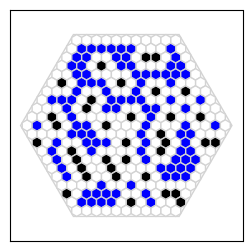

<Figure size 1000x1000 with 0 Axes>

In [ ]:
world = World.get_from_parameters_names(imp, "canonical", "21_05")
fig, axs = plt.subplots(figsize=(3, 3), nrows = 1, ncols = 1)
d = Display(world, background_color = 'white', cell_edge_color = 'lightgrey', habitat_edge_color='lightgrey', ax = axs)

# plot circle for each "new fake occlusion"
ids = [4,16,19,22,23,29,33,37,41,49,50,51,53,60,62,63,64,66,70,73,74,75,77,80,81,84,85,87,90,91,94,96,98,101,108,109,115,117,119,122,124,125,129,135,138,140,145,148,156,158,159,169,172,177,179,180,188,189,195,196,198,199,203,205,206,207,208,210,213,218,229,231,236,246,252,257,261,262,263,264,267,268,273,274,278,279,280,284,287,288,289,290,291,293,296,297,298,304,314,326]

for id in ids:
  d.cell(cell_id = id, color = "blue")

# 4. Check spawn locations - after running create_spwn_locations

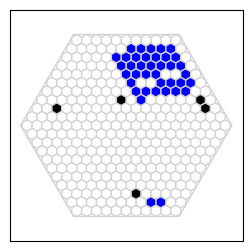

<Figure size 1000x1000 with 0 Axes>

In [ ]:
world = World.get_from_parameters_names(imp, "canonical", "22_01")
fig, axs = plt.subplots(figsize=(3, 3), nrows = 1, ncols = 1)
d = Display(world, background_color = 'white', cell_edge_color = 'lightgrey', habitat_edge_color='lightgrey', ax = axs)


# plot circle for each "new fake occlusion"
ids = [148,158,168,169,177,178,179,180,188,189,190,191,192,198,200,201,203,209,210,211,212,213,221,222,223,230,231,232,233,234,241,242,243,244,251,253,254,262,263,264,265,272,274,275,283,284,285,292,293,294,301,309,315,324,327]
# ids = [108,117,129,140,148,159,172,177,179,180,188,189,195,196,198,199,203,205,206,207,208,210,213,218,229,231,236,246,252,257,261,262,263,264,267,268,273,274,279,280,284,287,288,289,290,291,293,297,298,304,314,326]
ids = [108,117,129,140,148,159,172,177,179,180,188,189,195,196,198,199,203,205,206,207,208,210,213,218,229,231,236,246,252,257,261,262,263,264,267,268,273,274,279,280,284,287,288,289,290,291,293,297,298,304,314,326]
ids = [148,158,168,169,178,179,180,188,189,190,198,200,201,209,210,211,213,221,222,230,231,232,234,241,242,243,251,253,262,263,264,272,274,283,284,292,293,301]


for id in ids:
  d.cell(cell_id = id, color = "blue")

# Check possible destinations and spwan locations

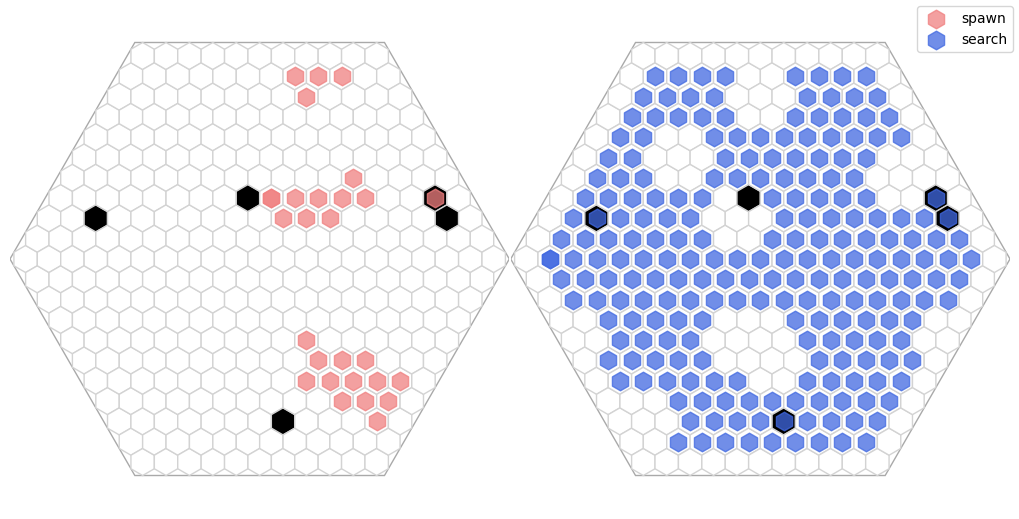

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# plt.close('all')
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(10, 5))
display = Display(world, padding=0, cell_edge_color="lightgrey", background_color="white", habitat_edge_color="darkgrey", ax = ax1)
display = Display(world, padding=0, cell_edge_color="lightgrey", background_color="white", habitat_edge_color="darkgrey", ax = ax2)

possible_destinations = world.create_cell_group(Cell_group_builder.get_from_name("hexagonal", occlusions + ".predator_destinations"))
spawn_locations = world.create_cell_group(Cell_group_builder.get_from_name("hexagonal", occlusions + ".spawn_locations"))

size = 180
i = True
for d in possible_destinations.get("location"):
  if i:
    i = False
    ax2.scatter(d.x, d.y , color="royalblue", alpha = 0.75, s = size, marker = 'h', label = 'search')
  ax2.scatter(d.x, d.y , color="royalblue", alpha = 0.75, s = size, marker = 'h')


i = True
for d in spawn_locations.get("location"):
  if i:
    i = False
    ax1.scatter(d.x, d.y , color="lightcoral", alpha = 0.75, s = size, marker = 'h', label = 'spawn')
  ax1.scatter(d.x, d.y , color="lightcoral", alpha = 0.75, s = size, marker = 'h')


for i in range(2):
  fig.axes[i].get_xaxis().set_visible(False)
  fig.axes[i].get_yaxis().set_visible(False)

ax1.axis('off')
ax2.axis('off')
fig.tight_layout(pad=0, w_pad=0.1, h_pad=0)
fig.legend()
